# Combination of All Datasets and Final Cross-Section Determination

In this step, the differential elastic cross-section results from all datasets and diagonals are combined to produce a single, high-precision measurement. The procedure involves:
* Merging the two diagonals for each dataset using a **weighted average** based on statistical uncertainties.
* Combining the three datasets into one global distribution.
* Performing an **exponential fit** to the low-$|t|$ region to extract $\left.\frac{d\sigma_{el}}{dt}\right|_{t=0}$ and the slope parameter $B$.
* Using the **optical theorem** to calculate the total cross-section $\sigma_{tot}$, and deriving $\sigma_{el}$ and $\sigma_{inel}$.
* Evaluating both **statistical** and **systematic** uncertainties for all extracted quantities.

This step provides the **final physics results** of the analysis, consolidating all corrections, fits, and uncertainty evaluations from the previous stages.


## Environment Setup 

In [1]:
import ROOT
import math
import numpy as np

ROOT.EnableImplicitMT() 

Code below loads the fully corrected differential elastic scattering cross-section histograms ($d\sigma_{\text{el}}/dt$) produced in Step 5 from the file `dsigma_dt.root`. For each dataset and diagonal, it retrieves the corresponding histogram, ensures it remains in memory, and checks that no entries are missing—otherwise prompting the user to re-run Step 5 for the specific case. Finally, it organizes all histograms into a structured container for easy comparison, averaging, or combined fits.

In [2]:
loaded = True

with ROOT.TFile(f"dsigma_dt.root") as file:
    try:
        dsigma_dt_dataset1_diagonal0 = file.Get("dataset1_diagonal0")
        dsigma_dt_dataset1_diagonal0.SetDirectory(0)
    except AttributeError:
        print(f"Missing dependency in file dsigma_dt.root: dataset1_diagonal0. Try running step5 analysis for dataset 1 AND diagonal 0.")
        loaded = False

    try:
        dsigma_dt_dataset1_diagonal1 = file.Get("dataset1_diagonal1")
        dsigma_dt_dataset1_diagonal1.SetDirectory(0)
    except AttributeError:
        print(f"Missing dependency in file dsigma_dt.root: dataset1_diagonal1. Try running step5 analysis for dataset 1 AND diagonal 1.")
        loaded = False

    try:
        dsigma_dt_dataset2_diagonal0 = file.Get("dataset2_diagonal0")
        dsigma_dt_dataset2_diagonal0.SetDirectory(0)
    except AttributeError:
        print(f"Missing dependency in file dsigma_dt.root: dataset2_diagonal0. Try running step5 analysis for dataset 2 AND diagonal 0.")
        loaded = False

    try:
        dsigma_dt_dataset2_diagonal1 = file.Get("dataset2_diagonal1")
        dsigma_dt_dataset2_diagonal1.SetDirectory(0)
    except AttributeError:
        print(f"Missing dependency in file dsigma_dt.root: dataset2_diagonal1. Try running step5 analysis for dataset 2 AND diagonal 1.")
        loaded = False

    try:
        dsigma_dt_dataset3_diagonal0 = file.Get("dataset3_diagonal0")
        dsigma_dt_dataset3_diagonal0.SetDirectory(0)
    except AttributeError:
        print(f"Missing dependency in file dsigma_dt.root: dataset3_diagonal0. Try running step5 analysis for dataset 3 AND diagonal 0.")
        loaded = False

    try:
        dsigma_dt_dataset3_diagonal1 = file.Get("dataset3_diagonal1")
        dsigma_dt_dataset3_diagonal1.SetDirectory(0)
    except AttributeError:
        print(f"Missing dependency in file dsigma_dt.root: dataset3_diagonal1. Try running step5 analysis for dataset 3 AND diagonal 1.")
        loaded = False

if not loaded:
    raise Exception("Some dependencies did not load properly")

dsigma_plots = (
    (dsigma_dt_dataset1_diagonal1, dsigma_dt_dataset1_diagonal0),
    (dsigma_dt_dataset2_diagonal1, dsigma_dt_dataset2_diagonal0),
    (dsigma_dt_dataset3_diagonal1, dsigma_dt_dataset3_diagonal0)
)

### Defining Custom Binning

Similarily to the previous notebooks lower and upper edges of the bins, which can be seen in the cell below, are exactly the same as those in the original article  [[1]](https://iopscience.iop.org/article/10.1209/0295-5075/101/21002#epl15159s5-2).

In [3]:
binning = np.array([0.0046, 0.0057, 0.0073, 0.009059, 0.01084, 0.01263, 0.01445, 0.01629, 0.01814, 0.02002, 0.02192, 0.02384, 
    0.02579, 0.02775, 0.02974, 0.03176, 0.0338, 0.03586, 0.03795, 0.04007, 0.04221, 0.04438, 0.04658, 0.04881, 
    0.05107, 0.05336, 0.05569, 0.05804, 0.06043, 0.06286, 0.06532, 0.06781, 0.07035, 0.07292, 0.07554, 0.07819, 
    0.08089, 0.08364, 0.08643, 0.08926, 0.09215, 0.09509, 0.09808, 0.1011, 0.1042, 0.1074, 0.1106, 0.1139, 0.1172, 
    0.1207, 0.1241, 0.1277, 0.1314, 0.1351, 0.1389, 0.1428, 0.1468, 0.1509, 0.1551, 0.1594, 0.1638, 0.1683, 0.173, 
    0.1778, 0.1827, 0.1878, 0.1931, 0.1985, 0.2041, 0.2099, 0.2159, 0.2221, 0.2286, 0.2353, 0.2424, 0.2497, 0.2573, 
    0.2654, 0.2738, 0.2827, 0.2921, 0.3021, 0.3127, 0.324, 0.3361, 0.3492, 0.3634, 0.3789])

## Comparing diagonals from all datasets

In the cell below, the `to_show` variable can be modified to view different comparison options.

In [4]:
# 1 - show diagonals from dataset 1
# 2 - show diagonals from dataset 2
# 3 - show diagonals from dataset 3
# 4 - show all diagonals

to_show = 3

if not isinstance(to_show, int) or not (1 <= to_show <= 4):
    raise ValueError("to_show variable has to be integer 1 or 2 or 3 or 4")

In [11]:
all_diagonals_canvas = ROOT.TCanvas()
legend = ROOT.TLegend(0.65, 0.6, 0.9, 0.9)

if to_show == 1 or to_show == 4:
    dsigma_dt_dataset1_diagonal0.Draw()
    dsigma_dt_dataset1_diagonal0.SetLineColor(2)
    dsigma_dt_dataset1_diagonal0.SetStats(0)
    legend.AddEntry(dsigma_dt_dataset1_diagonal0,"Dataset 1, diagonal 0")

    dsigma_dt_dataset1_diagonal1.Draw("same")
    dsigma_dt_dataset1_diagonal1.SetLineColor(3)
    dsigma_dt_dataset1_diagonal1.SetStats(0)
    legend.AddEntry(dsigma_dt_dataset1_diagonal1,"Dataset 1, diagonal 1")

if to_show == 2 or to_show == 4:
    dsigma_dt_dataset2_diagonal0.Draw("same")
    dsigma_dt_dataset2_diagonal0.SetLineColor(4)
    dsigma_dt_dataset2_diagonal0.SetStats(0)
    legend.AddEntry(dsigma_dt_dataset2_diagonal0,"Dataset 2, diagonal 0")

    dsigma_dt_dataset2_diagonal1.Draw("same")
    dsigma_dt_dataset2_diagonal1.SetLineColor(6)
    dsigma_dt_dataset2_diagonal1.SetStats(0)
    legend.AddEntry(dsigma_dt_dataset2_diagonal1,"Dataset 2, diagonal 1")

if to_show == 3 or to_show == 4:
    dsigma_dt_dataset3_diagonal0.Draw("same")
    dsigma_dt_dataset3_diagonal0.SetLineColor(7)
    dsigma_dt_dataset3_diagonal0.SetStats(0)
    legend.AddEntry(dsigma_dt_dataset3_diagonal0,"Dataset 3, diagonal 0")

    dsigma_dt_dataset3_diagonal1.Draw("same")
    dsigma_dt_dataset3_diagonal1.SetLineColor(8)
    dsigma_dt_dataset3_diagonal1.SetStats(0)
    legend.AddEntry(dsigma_dt_dataset3_diagonal1,"Dataset 3, diagonal 1")

    
legend.Draw()
all_diagonals_canvas.SetLogy()
all_diagonals_canvas.Draw()


**Figure 1.** Comparison of different diagonals for the selected configuration.


In the low-$|t|$ range ($\lesssim 0.2 \ \text{GeV}^2$), the two diagonals almost perfectly overlap, confirming the consistency of the detector alignment and correction procedures. At higher $|t|$, statistical fluctuations grow and acceptance becomes more limited, so deviations between diagonals are expected. The near-linear drop at small $|t|$ confirms the diffractive-like behavior, described by the exponential form $e^{-B|t|}$.

## Combining diagonals for each dataset

This code takes the two diagonals for each dataset and combines them into a single averaged histogram for $d\sigma_{el}/dt$ using a **weighted average method**:

For each bin, the combined value $v$ is calculated as the weighted average of the two diagonals:

$$v = \frac{w_1 v_1 + w_2 v_2}{w_1 + w_2}$$

Where:
* $v_1$ and $v_2$ are the bin contents for the two diagonals,
* $w_1 = \frac{1}{e_1^2}$ and $w_2 = \frac{1}{e_2^2}$ are the statistical weights,
* $e_1$ and $e_2$ are the bin errors for the two diagonals.

The combined statistical error $e$ is given by:

$$e = \frac{1}{\sqrt{w_1 + w_2}}$$

If one diagonal has a smaller error, it has a larger weight and thus contributes more to the final average. If one diagonal has a very large error, its weight becomes small, meaning the more precise diagonal dominates the result. This method ensures that the final combined value is statistically optimal, minimizing the overall uncertainty.

In [6]:
dsigma_diagonal_average = []

for i, (dsigma_45b_56t, dsigma_45t_56b) in enumerate(dsigma_plots):
    h_t = ROOT.TH1F(f"h_t{i+1}", f"Combined Histogram {i+1}", len(binning)-1, binning)
    for i in range(1, h_t.GetNbinsX() + 1):
        # Get bin contents and errors for both histograms
        v1 = dsigma_45b_56t.GetBinContent(i)
        e1 = dsigma_45b_56t.GetBinError(i)
        
        v2 = dsigma_45t_56b.GetBinContent(i)
        e2 = dsigma_45t_56b.GetBinError(i)
        
        # Compute weights
        w1 = 1. / (e1 * e1) if e1 > 0. else 0.
        w2 = 1. / (e2 * e2) if e2 > 0. else 0.
        
        # Calculate combined value and error
        v = (w1 * v1 + w2 * v2) / (w1 + w2) if (w1 + w2) > 0. else 0.
        e = 1. / math.sqrt(w1 + w2) if (w1 + w2) > 0. else 0.
        
        # Set the content and error in the target histogram
        h_t.SetBinContent(i, v)
        h_t.SetBinError(i, e)
    dsigma_diagonal_average.append(h_t)

## Combining datasets
This code combines the averaged results from all three datasets into a single $d\sigma_{el}/dt$ histogram. For each $|t|$ bin, the values from each dataset are merged using a weighted average, similar to the method used in the previous cell.

In [7]:
dsigma_full = ROOT.TH1F("dsigma_full", f"Elastic cross section;|t| [GeV^{2}];d#sigma_{{el}}/dt [mb/GeV^{2}]", len(binning)-1, binning)
for i in range(1, h_t.GetNbinsX() + 1):
    v1 = dsigma_diagonal_average[0].GetBinContent(i)
    e1 = dsigma_diagonal_average[0].GetBinError(i)

    v2 = dsigma_diagonal_average[1].GetBinContent(i)
    e2 = dsigma_diagonal_average[1].GetBinError(i)

    v3 = dsigma_diagonal_average[2].GetBinContent(i)
    e3 = dsigma_diagonal_average[2].GetBinError(i)

    # Compute weights
    w1 = 1. / (e1 * e1) if e1 > 0. else 0.
    w2 = 1. / (e2 * e2) if e2 > 0. else 0.
    w3 = 1. / (e3 * e3) if e3 > 0. else 0.

    sum_weights = w1 + w2 + w3

    # Calculate combined value and error
    v = (w1 * v1 + w2 * v2 + w3 * v3) / sum_weights if sum_weights > 0. else 0.
    e = 1. / math.sqrt(sum_weights) if (sum_weights) > 0. else 0.

    # Set the content and error in the target histogram
    dsigma_full.SetBinContent(i, v)
    dsigma_full.SetBinError(i, e)

## Combined proton-proton elastic scattering cross-section

In [8]:
c = ROOT.TCanvas()

dsigma_full.Draw()
dsigma_full.SetStats(0)

c.SetLogy()
c.Draw()

**Figure 2.** Elastic scattering cross section from all 3 datasets combined together. 

- At low $|t| \lesssim 0.2 \, \text{GeV}^2$, the distribution exhibits a smooth exponential decrease, consistent with diffractive scattering and the $e^{-B|t|}$ behavior. At higher $|t|$, the statistical uncertainties increase and small deviations appear, which are expected due to limited detector acceptance and reduced event counts.

## Uncertainties

Aside from statistical uncertainties, there were also systematic uncertainties present in the analysis. While statistical uncertainties arise from the finite size of the data sample, **systematic uncertainties** originate from factors such as detector effects, calibration, and beam conditions. These are separated into three main categories:

1. **$t$-dependent uncertainties**: These vary with $|t|$ and typically stem from effects like detector resolution, acceptance corrections, unfolding procedures, and efficiency corrections.  
   - At low $|t|$ (e.g., $|t| = 0.005\ \mathrm{GeV}^2$), these are small ($\sim 1\%$–$2\%$) due to high statistics and good detector coverage.  
   - At higher $|t|$ values, they increase significantly (up to $12.3\%$ at $|t| = 0.4\ \mathrm{GeV}^2$) because acceptance drops. (primarily due to the limited geometric coverage of the detectors at large scattering angles) and statistical fluctuations in corrections become more significant.

2. **Normalization uncertainty**: This is a **global scaling uncertainty**, meaning it shifts the *entire* $d\sigma_{el}/dt$ distribution up or down by the same relative amount, without changing its shape.  
   - It usually comes from uncertainties in factors that multiply the whole cross-section equally, such as:  
     - **Total efficiency corrections** (how well the detector records and reconstructs events overall).  
     - **Background subtraction scaling factors** (how accurately we remove non-elastic events).  
   - Because these effects are *multiplicative* and not dependent on $|t|$, they are the same for all bins.  
   - In this table, only one bin ($|t| = 0.12\ \mathrm{GeV}^2$) explicitly lists a normalization contribution of $1.2\%$.

3. **Luminosity uncertainty**: This comes from the precision of the **integrated luminosity** measurement, which is a key factor in converting the number of observed elastic scattering events into an absolute cross-section value.  
   - Integrated luminosity ($\mathcal{L}$) essentially tells us the total number of proton-proton collision opportunities during the data-taking period. The cross section is calculated as $ \sigma = N / \mathcal{L} $, so any uncertainty in $\mathcal{L}$ directly scales the final result.  
   - If the luminosity is overestimated, the cross section will be underestimated (and vice versa).  
   - In this table, a $4.0\%$ luminosity uncertainty is reported at $|t| = 0.12\ \mathrm{GeV}^2$.

4. **Total uncertainty**: Calculated as the quadratic sum of all contributions. This ensures that independent sources of uncertainty are combined without double counting:  
     $$ \delta_{\text{total}} = \sqrt{\delta_t^2 + \delta_{\text{norm}}^2 + \delta_{\text{lumi}}^2} $$


- At **low $|t|$**, the total uncertainty is dominated by the luminosity and normalization contributions, which are constant or nearly constant across bins.  
- At **high $|t|$**, the $t$-dependent uncertainty dominates because corrections (such as acceptance and unfolding) become less precise as event counts drop.  


 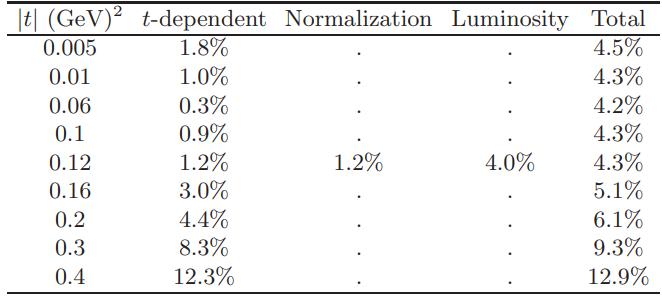

 **Table 1.** Overview of the systematic uncertainties of the differential cross-section $d\sigma_{el}/dt$

## Fitting and Extrapolation

In this step, we fit the final combined differential elastic cross-section data with the exponential model given:

$$\frac{d\sigma_{el}}{dt} = \left.\frac{d\sigma_{el}}{dt}\right|_{t=0} e^{-B|t|}\tag{1}$$

The fit is performed in the range $ |t| \in [0.005, 0.2] \ \mathrm{GeV}^2 $, following the TOTEM reference values.  
This exponential behaviour is motivated by the diffractive nature of elastic $pp$ scattering at small $|t|$, where the data on a semi-logarithmic scale forms an almost straight line.

- **$p_0$** corresponds to $ \left.\frac{d\sigma_{el}}{dt}\right|_{t=0} $, the extrapolated value of the differential cross section at $ t = 0 $.  
  This is important for applying the *optical theorem* to extract the total cross section.
- **$p_1$** is the slope $ -B $, related to the spatial distribution of scattering centres inside the proton.

The fit allows us to evaluate $ f(0) $, even though $ t=0 $ is experimentally inaccessible due to beam optics limitations.  
By extending the exponential fit to $ t=0 $, we obtain the value needed for total cross-section determination.


In [9]:
fit_low_x_GeV2 = 0.005  # values in the article: 0.005 or 0.02
fit_high_x_GeV2 = 0.2   # values in the article: 0.1 or 0.2

dsigma_dt_fit_canvas = ROOT.TCanvas()

fit_function = ROOT.TF1(f"fit_function", "[0]*exp([1]*x)", fit_low_x_GeV2, fit_high_x_GeV2) 

dsigma_full.Fit(fit_function, "0R")

dsigma_full.Draw()
dsigma_full.SetStats(0)
fit_function.Draw("same")

dsigma_dt_fit_canvas.SetLogy()
dsigma_dt_fit_canvas.Draw()

print(f"Extrapolated value of f(0) equals: {fit_function(0.0):.1f}")

Extrapolated value of f(0) equals: 506.0
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      112.644
NDf                       =           64
Edm                       =  8.66812e-10
NCalls                    =           83
p0                        =      505.987   +/-   0.907579    
p1                        =     -19.8814   +/-   0.0252525   


**Figure 3.** Elastic scattering cross section from all 3 datasets combined, along with the fitted function and its extrapolation to zero. 

## Determination of Total, and Inelastic Cross-Sections

In this step, we use the fitted value of $ \left.\frac{d\sigma_{el}}{dt}\right|_{t=0} $ from the previous analysis to compute the **total scattering cross-section** via the *optical theorem*:

$$\sigma_{tot}^2 = \frac{16\pi(\hbar c)^2}{1+\rho^2} \left.\frac{d\sigma_{el}}{dt}\right|_{t=0} \tag{2}$$

Where:
- $(\hbar c)^2$ is taken from [[2]](https://pdg.lbl.gov/2010/reviews/rpp2010-rev-phys-constants.pdf).
- $\rho$ is the ratio of the real to imaginary part of the forward scattering amplitude.

Once $\sigma_{tot}$ and $\sigma_{el}$, which is an integral of Eq. (1) over $|t|$ is known, we can calculate:

**Inelastic cross-section** $\sigma_{inel}$ using:

$$\sigma_{inel} = \sigma_{tot} - \sigma_{el}\tag{3}$$

- $\sigma_{tot}$ tells us the total probability (in area units) that any interaction — elastic or inelastic — occurs between two protons.
- $\sigma_{el}$ quantifies the fraction of those interactions where protons remain intact (no particle production).
- $\sigma_{inel}$ is the complementary fraction where new particles are produced (inelastic scattering).

This separation is essential in high-energy physics because it helps quantify how much of the proton’s interaction probability is due to purely elastic processes versus particle-producing collisions.


In [10]:
h_bar_c_sq = 0.389379304                          # Gev^2 * mb
ro = 0.141                                        # dimensionless
pi = 3.14159265359                                # dimensionless
dsigma_el_dt_extrapolation = fit_function(0.0)    # mb / GeV^2


sigma_total = math.sqrt(((16*pi * h_bar_c_sq) / (1 + ro**2)) * dsigma_el_dt_extrapolation)
sigma_elastic = fit_function.Integral(0, 0.415)
sigma_inelastic = sigma_total - sigma_elastic


print(f"Total scattering cross-section: {sigma_total:.2f}")
print(f"Total elastic scattering cross-section: {sigma_elastic:.2f}")
print(f"Total inelastic scttering cross-section: {sigma_inelastic:.2f}")

Total scattering cross-section: 98.54
Total elastic scattering cross-section: 25.44
Total inelastic scttering cross-section: 73.10


## Summary of Results and Uncertainties

Table 2 presents the final measured quantities from the analysis, along with a detailed breakdown of their **statistical** and **systematic uncertainties**.

* **$d\sigma_{el}/dt$ - the differential elastic cross-section** 
  - It has a small statistical error ($\pm 0.9$) but large systematic uncertainties, particularly from **luminosity** ($\pm 20.4$) and **$t$-dependent effects** ($\pm 8.6$).  
  - The total uncertainty, obtained by quadratically combining all contributions, is $\pm 23.0$.

* **$B$ - The slope parameter of the exponential fit**
  - Very precisely determined from the fit, with a total uncertainty of only $\pm 0.27\ \mathrm{GeV}^{-2}$.  
  - Dominated by $t$-dependent effects, as normalization and luminosity uncertainties do not affect the slope.

* **$\sigma_{el}$ - the total elastic cross-section**    
  - The statistical uncertainty is small ($\pm 0.03$ mb).  
  - Systematic uncertainties are mainly from normalization ($\pm 0.31$ mb) and luminosity ($\pm 1.02$ mb).  
  - The total uncertainty is $\pm 1.07$ mb.

* **$\sigma_{tot}$ - the total cross-section**   
  - It has contributions from **$t$-dependent effects**, **normalization**, **luminosity**, and the uncertainty in $\rho$.  
  - The total uncertainty is $\pm 2.23$ mb.

* **$\sigma_{inel}$ - the total inelastic cross-section**  
  - It inherits uncertainties from both $\sigma_{tot}$ and $\sigma_{el}$, leading to a total uncertainty of $\pm 1.26$ mb.

The **largest single source of uncertainty** in this analysis is the **luminosity uncertainty** in $\left.\frac{d\sigma_{el}}{dt}\right|_{t=0}$, which propagates strongly into $\sigma_{tot}$ and $\sigma_{inel}$. This highlights the importance of precise luminosity measurements in total cross-section determinations.


**Table 2.** Summarized results with detailed uncertainty compositions. The $|t|$-dependent, normalization, and luminosity uncertainties correspond to those presented in Table 1.

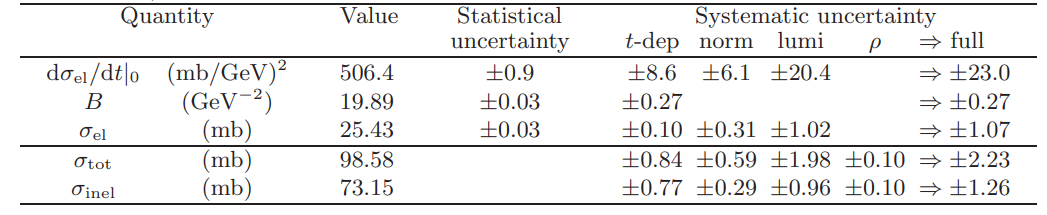